In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the vaccination dataset
df = pd.read_csv('Covid-19 Vaccination.csv')

In [18]:
# Convert 'Updated On' to datetime
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%d/%m/%Y')

In [19]:
# Convert 'Updated On' to datetime
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%d/%m/%Y')

In [20]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           3552 non-null   datetime64[ns]
 1   State                                3552 non-null   object        
 2   Total Individuals Registered         3551 non-null   float64       
 3   Total Sessions Conducted             3551 non-null   float64       
 4   Total Sites                          3551 non-null   float64       
 5   First Dose Administered              3551 non-null   float64       
 6   Second Dose Administered             3551 non-null   float64       
 7   Male(Individuals Vaccinated)         3551 non-null   float64       
 8   Female(Individuals Vaccinated)       3551 non-null   float64       
 9   Transgender(Individuals Vaccinated)  3551 non-null   float64       
 10

In [21]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           3552 non-null   datetime64[ns]
 1   State                                3552 non-null   object        
 2   Total Individuals Registered         3551 non-null   float64       
 3   Total Sessions Conducted             3551 non-null   float64       
 4   Total Sites                          3551 non-null   float64       
 5   First Dose Administered              3551 non-null   float64       
 6   Second Dose Administered             3551 non-null   float64       
 7   Male(Individuals Vaccinated)         3551 non-null   float64       
 8   Female(Individuals Vaccinated)       3551 non-null   float64       
 9   Transgender(Individuals Vaccinated)  3551 non-null   float64       
 10

In [22]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Updated On                             0
State                                  0
Total Individuals Registered           1
Total Sessions Conducted               1
Total Sites                            1
First Dose Administered                1
Second Dose Administered               1
Male(Individuals Vaccinated)           1
Female(Individuals Vaccinated)         1
Transgender(Individuals Vaccinated)    1
Total Covaxin Administered             1
Total CoviShield Administered          1
Total Individuals Vaccinated           1
Total Doses Administered               0
dtype: int64


In [23]:
# Fill missing values with 0 (if appropriate)
df.fillna(0, inplace=True)

In [24]:
# Display first few rows
df.head()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
0,2021-01-16,Lakshadweep,776.0,1.0,1.0,16.0,0.0,14.0,2.0,0.0,0.0,16.0,16.0,16
1,2021-01-16,Ladakh,9378.0,1.0,1.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0,9.0,9
2,2021-01-16,Andaman and Nicobar Islands,6028.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0,23
3,2021-01-17,Ladakh,9621.0,2.0,2.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0,9.0,9
4,2021-01-16,Sikkim,11519.0,2.0,2.0,7.0,0.0,3.0,4.0,0.0,0.0,7.0,7.0,7


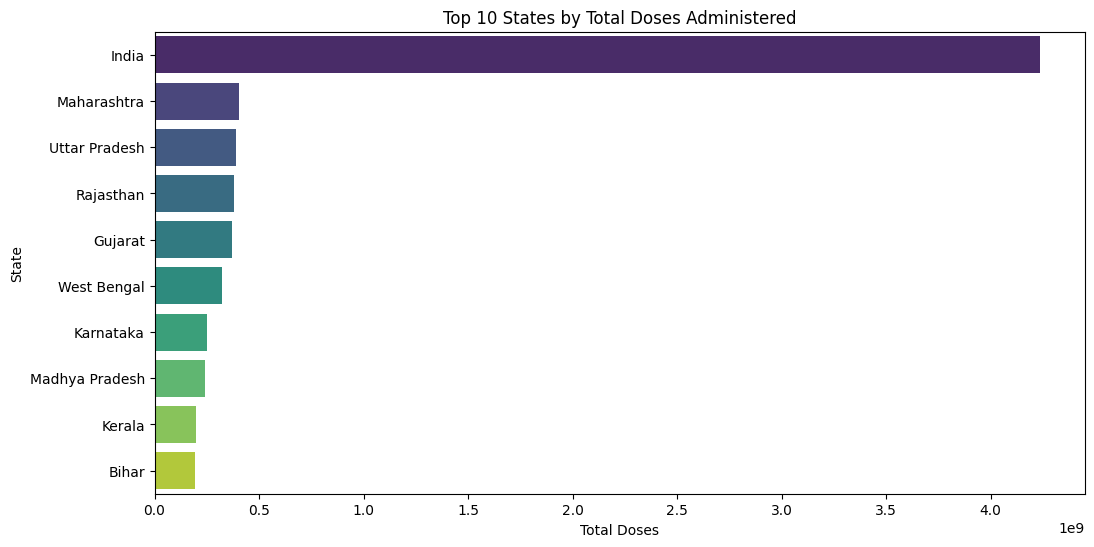

In [25]:
# Total Vaccinations by State
state_vacc = df.groupby('State')['Total Doses Administered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_vacc.values, y=state_vacc.index, palette='viridis')
plt.title("Top 10 States by Total Doses Administered")
plt.xlabel("Total Doses")
plt.ylabel("State")
plt.show()


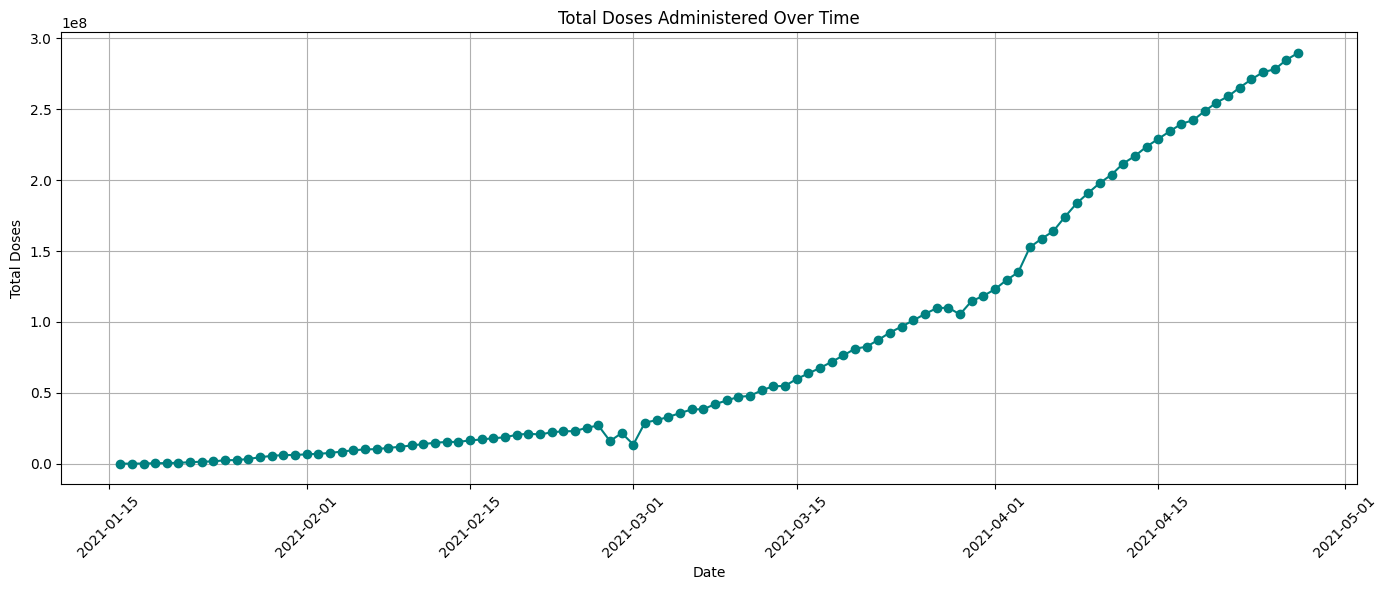

In [27]:
#  Vaccination Trend Over Time
date_vacc = df.groupby('Updated On')['Total Doses Administered'].sum()

plt.figure(figsize=(14, 6))
plt.plot(date_vacc.index, date_vacc.values, marker='o', color='teal')
plt.title("Total Doses Administered Over Time")
plt.xlabel("Date")
plt.ylabel("Total Doses")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


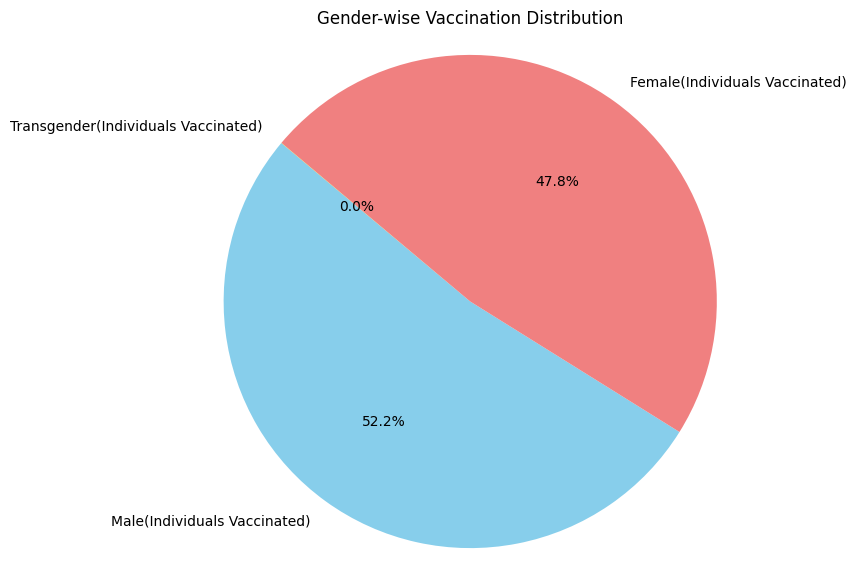

In [28]:
# . Gender Distribution
gender_totals = df[['Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)']].sum()

plt.figure(figsize=(7, 7))
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'gold'])
plt.title("Gender-wise Vaccination Distribution")
plt.axis('equal')
plt.show()
